In [1]:
using DelimitedFiles, Plots, Statistics

In [2]:
using CurveFit, LaTeXStrings

# read 1 run

In [3]:
#path = "tmp_stab/res_epid_stab/"
path = "tmp_stab/res_epid_1graph_stab/"

"tmp_stab/res_epid_1graph_stab/"

TIT = "T=8, λ=1.0, γ=0.0059, N=500000"
namefile = "tmp_stab/res_epid_1graph_stab/gam0.0059/fileres_epid_1graph_stab_T8_LAM1.0_GAM0.0059_N500000_iter500_run8"


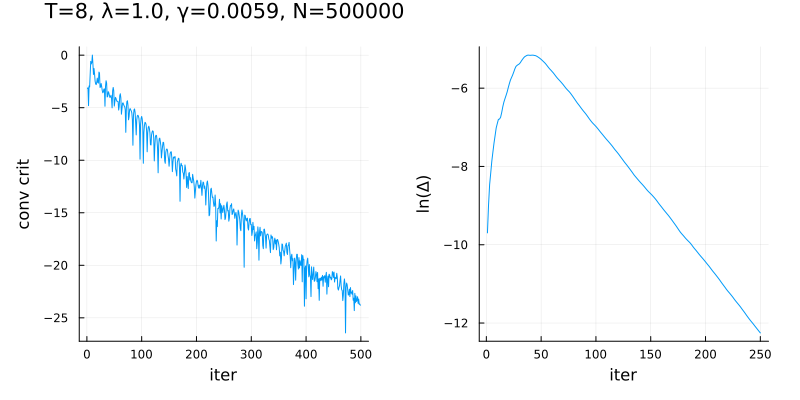

In [7]:
extension= "_run8" 
T=8
LAM=1.0
GAM=0.0059
N=500000
iter=500
halfiter=Int64(iter/2)+2

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam= "gam"*string(GAM)*"/"
nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)

#namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
namefile = path*foldergam*"fileres_epid_1graph_stab_"*nameparams*extension
@show namefile
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])

pconv=plot(xaxis="iter", yaxis="conv crit", title=TIT);
plot!(pconv,log.(res[iter_full,2]), label="")
#plot!(pconv,res[iter_full,2], label="")

pd1 = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pd1, log_Δ, label="")

pγ= plot(pconv, pd1, size=(800,400), layout=(1,2), margin=6*Plots.mm)

sfitΔ = 0.9656521337540728


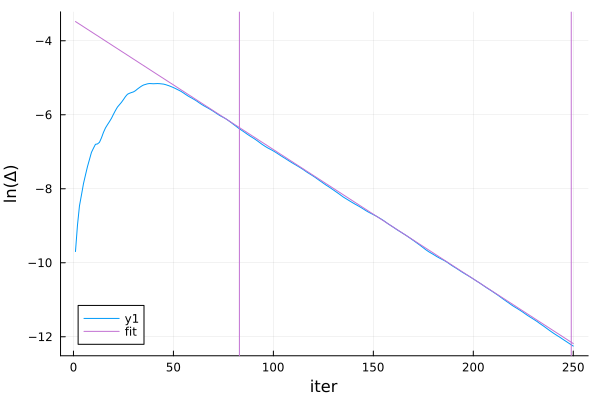

In [8]:
pΔ = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pΔ, log_Δ)
if res[iter_Δ[end],3] < 1
    #linear fit
    frac_cut = 3
    lsta = Int64(round(length(iter_Δ)/frac_cut))
    lend = length(iter_Δ)-1#-lsta
    log_Δ = log.(res[iter_Δ,3])
    log_Δ_cut = log_Δ[lsta:lend]
    (a,b)=linear_fit(lsta:lend, log_Δ_cut)
    sfitΔ = exp(b)
    @show sfitΔ
    lmid=Int64(round((lsta+lend)/2))
    diff_fit = b*lmid - log_Δ[lmid]  
    vline!(pΔ, [lsta], color=4, label="")
    vline!(pΔ, [lend], color=4, label="")    
    plot!(pΔ, b.*(1:length(iter_Δ)).-diff_fit, label="fit")
    plot(pΔ)
else
    gmΔ=Inf
    plot(pΔ)
end

In [9]:
#savefig(p1run, "freen_err_stab_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

# loop on γ (10 runs per γ)

In [125]:
T=8
LAM=1.0
path = "tmp_stab/res_epid_stab/"
#path = "tmp_stab/res_epid_1graph_stab/"
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));
N= 50000 #5000
iter=500
halfiter=Int64(iter/2)+2

#OLD STAB
#runs_range = 101:110
#γ16 = [0.016, 0.0165, 0.0167, 0.0168]
#γ17 = [0.017, 0.0172, 0.0173, 0.0175, 0.0177, 0.0178]
#γ18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0185]
#γ_range=vcat([0.0155], γ16, γ17, γ18, [0.019, 0.02, 0.021]);
#nbruns = length(runs_range)

#STAB
runs_range=1:10
γ_left = sort(vcat([0.0045,0.0049], 0.005:0.0001:0.0055))#, [0.006])
γ_right = sort(vcat(0.014:0.001:0.02, 0.0155:0.001:0.0185))
γ_range=γ_left #vcat(γ_left, γ_right)
nbruns = length(runs_range)

#1GRAPH STAB
#runs_range = 1:10
#γ_left = [0.00525, 0.0054, 0.0055, 0.0056, 0.0057, 0.00575, 0.0058, 0.0059, 0.006, 0.0061] 
##γ_left = sort(vcat(0.005:0.00025:0.00575,[0.0058]))#,[0.006]))
#γ_right = vcat(0.01:0.0005:0.012,0.013:0.001:0.014)
##γ_right = [0.01, 0.0105, 0.011]
#γ_range = γ_right #γ_right
#nbruns = length(runs_range)

10

In [126]:
gam_res = zeros(length(γ_range), length(runs_range));
err_res = zeros(length(γ_range), length(runs_range));
for iγ in 1:length(γ_range)
    for irun in 1:length(runs_range)
#iγ=5
#irun=2
        run=runs_range[irun]
        GAM=γ_range[iγ]
        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*foldergam*"fileres_epid_stab"*nameparams*extension*string(run)
#        namefile = path*foldergam*"fileres_epid_1graph_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        res = file[4:end,1:3]
        iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
        iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
        iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])

        frac_cut_err = 30
        lsta_err = Int64(length(iter_err)-round(length(iter_err)/frac_cut_err))
        lend_err = length(iter_err)-1
        #@show run, GAM, lsta_err, lend_err
        err=std(res[iter_err[lsta_err:lend_err],2])
        frac_cut = 3
        if length(iter_Δ)>0 && res[iter_Δ[end],3] < 1 
            #linear fit
            frac_cut = 3
            lsta = Int64(round(length(iter_Δ)/frac_cut))
            lend = length(iter_Δ)-1#-lsta
            log_Δ = log.(res[iter_Δ,3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=Inf
            err=Inf
        end
        #@show GAM, run, err, sfitΔ
        err_res[iγ,irun]=err
        gam_res[iγ,irun]=sfitΔ
    end
end

In [127]:
permutedims(err_res[:,:])

10×8 Matrix{Float64}:
 0.0218047  0.029133   0.0263509  0.0250097  …  0.0173317  Inf         Inf
 0.0226945  0.0292459  0.0184812  0.0271689     0.0309766  Inf         Inf
 0.0199267  0.0325267  0.0324062  0.0212309     0.0250141   0.0289387  Inf
 0.0323535  0.022106   0.0216477  0.0376674     0.0384155   0.0360822  Inf
 0.0191516  0.0231303  0.0236341  0.024751      0.0170637   0.0261527  Inf
 0.0143377  0.0378237  0.0215548  0.0204344  …  0.0194506  Inf         Inf
 0.0291978  0.0254038  0.0241369  0.0267911     0.022793    0.0232891  Inf
 0.0239632  0.021816   0.0262404  0.0225536     0.0240532   0.027641   Inf
 0.0132313  0.0228985  0.0237995  0.0241466     0.0282637   0.027067   Inf
 0.03085    0.0318037  0.0252691  0.0285988     0.0334528   0.0309266  Inf

In [128]:
frac_conv = sum(.!isinf.(err_res), dims=2)./length(runs_range)
mean_err = zeros(length(γ_range))
std_err = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    indicesconv=.!isinf.(err_res[iγ,:])
    mean_err[iγ]=mean(err_res[iγ,indicesconv])
    std_err[iγ]=std(err_res[iγ,indicesconv])
end

In [129]:
permutedims(gam_res[:,:])

10×8 Matrix{Float64}:
 0.000229653  0.00567931  0.134208   …  0.165273  0.239658  Inf        Inf
 0.000490832  0.0106673   0.0673737     0.283064  0.334918  Inf        Inf
 0.000672778  0.0368423   0.0316591     0.151977  0.419139   0.835026  Inf
 1.28458e-6   0.0217765   0.0586552     0.112843  0.463223   0.623252  Inf
 0.000249039  0.0134992   0.0415584     0.206203  0.395513   1.00527   Inf
 0.000442512  0.0318541   0.0239949  …  0.259147  0.628792  Inf        Inf
 0.000630233  0.0281248   0.0907048     0.185937  0.322936   0.499302  Inf
 0.000438601  0.0335663   0.0541845     0.265909  0.626421   0.736151  Inf
 0.000242118  0.0337711   0.074675      0.234816  0.267924   0.731931  Inf
 0.00213319   0.0412376   0.0369027     0.339883  0.39673    0.703292  Inf

In [130]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(γ_range))
std_stab = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    indicesconv=.!isinf.(gam_res[iγ,:])
    @show γ, indicesconv
    mean_stab[iγ]=mean(gam_res[iγ,indicesconv])
    std_stab[iγ]=std(gam_res[iγ,indicesconv])
end

(γ, indicesconv) = (0.0045, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0049, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.005, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0051, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0052, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0053, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0054, Bool[0, 0, 1, 1, 1, 0, 1, 1, 1, 1])
(γ, indicesconv) = (0.0055, Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [131]:
hcat(1:length(γ_range), γ_range, mean_stab,std_stab, mean_err, std_err)

8×6 Matrix{Float64}:
 1.0  0.0045    0.000553024    0.000591087    0.0227511    0.00653258
 2.0  0.0049    0.0257018      0.0121445      0.0275887    0.00539618
 3.0  0.005     0.0613916      0.0328443      0.0243521    0.00370799
 4.0  0.0051    0.125976       0.0255615      0.0258352    0.00490098
 5.0  0.0052    0.220505       0.0688487      0.0212315    0.00428311
 6.0  0.0053    0.409526       0.133511       0.0256815    0.00708287
 7.0  0.0054    0.733461       0.159213       0.0285853    0.0040615
 8.0  0.0055  NaN            NaN            NaN          NaN

In [132]:
"""
#FIT RIGHT
pts_fit= 4:9 #2:7 
fit_range_plot= 0.015:0.001:0.02 #0.0098:0.001:0.014
(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_stab[pts_fit], 2)
@show a0,a1,a2
discrim=a1^2-4*a2*(a0-1)
solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)
"""

"#FIT RIGHT\npts_fit= 4:9 #2:7 \nfit_range_plot= 0.015:0.001:0.02 #0.0098:0.001:0.014\n(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_stab[pts_fit], 2)\n@show a0,a1,a2\ndiscrim=a1^2-4*a2*(a0-1)\nsolm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)\n"

In [143]:
#"""
#FIT LEFT
pts_fit= 2:7  
fit_range_plot= 0.00495:0.00001:0.0055  
(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_stab[pts_fit], 2)
@show a0,a1,a2
discrim=a1^2-4*a2*(a0-1)
solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)
#"""

(a0, a1, a2) = (85.11162979824475, -34326.729208218094, 3.462448779835213e6)


(0.00442847606637945, 0.005485527400800155)

In [144]:
#scatter!(pstab,γ_range,mean_stab, yerr=std_stab, label="", markershape=:+, markerstrokewidth=3, markersize = 3);
#scatter!(pconv, γ_range,frac_conv.*nbruns, label="", markershape=:x, markerstrokewidth=3);
#scatter!(perr,γ_range,mean_err, yerr=std_err, label="", markershape=:+, markerstrokewidth=3, markersize = 3);
#pγ= plot(pstab, perr, pconv, size=(1000,330), layout=(1,3), margin=4*Plots.mm, plot_title=pTIT)

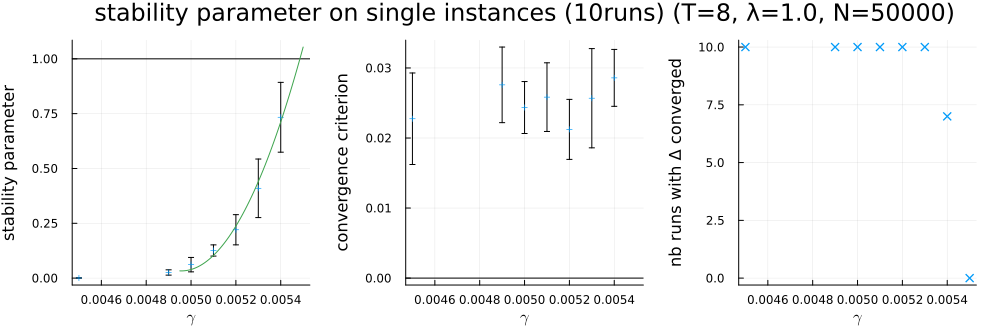

In [145]:
pstab=plot(yaxis="stability parameter", xaxis=L"γ")
scatter!(pstab,γ_range,mean_stab, yerr=std_stab, label="", markershape=:+, markerstrokewidth=1, markersize = 3);
hline!(pstab, [1], color="black", label="")
plot!(pstab, fit_range_plot, a2.*fit_range_plot.*fit_range_plot .+ a1.*fit_range_plot .+ a0, label="")

pconv=plot(yaxis="nb runs with Δ converged", xaxis=L"γ")
scatter!(pconv, γ_range,frac_conv.*nbruns, label="", markershape=:x, markerstrokewidth=2);

pTIT="stability parameter on single instances ("*string(nbruns)*"runs) (T="*string(T)*", λ="*string(LAM)*", N="*string(N)*")"

perr=plot(yaxis="convergence criterion", xaxis=L"γ")
scatter!(perr,γ_range,mean_err, yerr=std_err, label="", markershape=:+, markerstrokewidth=1, markersize = 3);
hline!(perr, [0], color="black", label="")
pγ= plot(pstab, perr, pconv, size=(1000,330), layout=(1,3), margin=4*Plots.mm, plot_title=pTIT)
#pγ= plot(pstab, perr, size=(800,400), layout=(1,2), margin=6*Plots.mm)

In [146]:
savefig(pγ, "stabav_LEFT_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/stabav_LEFT_T8_λ1.0_N50000.pdf"

# loop on γ on single graphs (10 runs per γ)

In [3]:
T=8
LAM=1.0
#path = "tmp_stab/res_epid_1graph_stab/"
path = "tmp_stab/"
pfits = plot(xaxis="γ", title="stability parameter (10 graphs): T="*string(T)*", λ="*string(LAM));
N=50000
iter=500

runs_range = 1:1 #1:10
γ_range_1=0.004:0.002:0.02;
nbruns = length(runs_range)

1

In [4]:
gam_res_1 = zeros(length(γ_range_1), length(runs_range));
err_res_1 = zeros(length(γ_range_1), length(runs_range));
for iγ in 1:length(γ_range_1)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        GAM=γ_range_1[iγ]
        #@show iγ, GAM, irun

        #foldergam="gam"*string(GAM)*"/"
        foldergam=""
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*foldergam*"fileres_epid_1graph_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        if size(file)[1]==2
            err_res_1[iγ,irun]=Inf
            gam_res_1[iγ,irun]=Inf
            continue
        end
        res = file[3:end-1,1:3]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])

        if res[iter_Δ[end],3] < 1
            #linear fit
            ratio_Δ = [abs(res[i,3]/res[i-1,3]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            log_Δ = log.(res[iter_Δ[halfiter:end],3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=Inf
        end
        
        err=std(res[halfiter:end-1,2]) #res[end-1,2]
        err_res_1[iγ,irun]=err
        #@show GAM, run, err, sfitΔ
        
        gam_res_1[iγ,irun]=sfitΔ
    end
end

In [5]:
frac_conv = sum(.!isinf.(gam_res_1), dims=2)./length(runs_range)
mean_stab_1 = zeros(length(γ_range_1))
std_stab_1 = zeros(length(γ_range_1));
mean_err_1 = zeros(length(γ_range_1))
std_err_1 = zeros(length(γ_range_1));
for iγ in 1:length(γ_range_1)
    γ=γ_range_1[iγ]
    indicesconv=.!isinf.(gam_res_1[iγ,:])
    @show γ, indicesconv
    mean_stab_1[iγ]=mean(gam_res_1[iγ,indicesconv])
    std_stab_1[iγ]=std(gam_res_1[iγ,indicesconv])
    mean_err_1[iγ]=mean(err_res_1[iγ,indicesconv])
    std_err_1[iγ]=std(err_res_1[iγ,indicesconv])
end

(γ, indicesconv) = (0.004, Bool[1])
(γ, indicesconv) = (0.006, Bool[1])
(γ, indicesconv) = (0.008, Bool[0])
(γ, indicesconv) = (0.01, Bool[1])
(γ, indicesconv) = (0.012, Bool[1])
(γ, indicesconv) = (0.014, Bool[1])
(γ, indicesconv) = (0.016, Bool[1])
(γ, indicesconv) = (0.018, Bool[1])
(γ, indicesconv) = (0.02, Bool[1])


In [6]:
mean_stab_1

9-element Vector{Float64}:
 NaN
   0.9738850951346173
 NaN
   0.9980634262321041
   0.8572144792406646
   0.7354209452258075
   0.6388368727158863
   0.5536300802507761
   0.4804137757692148

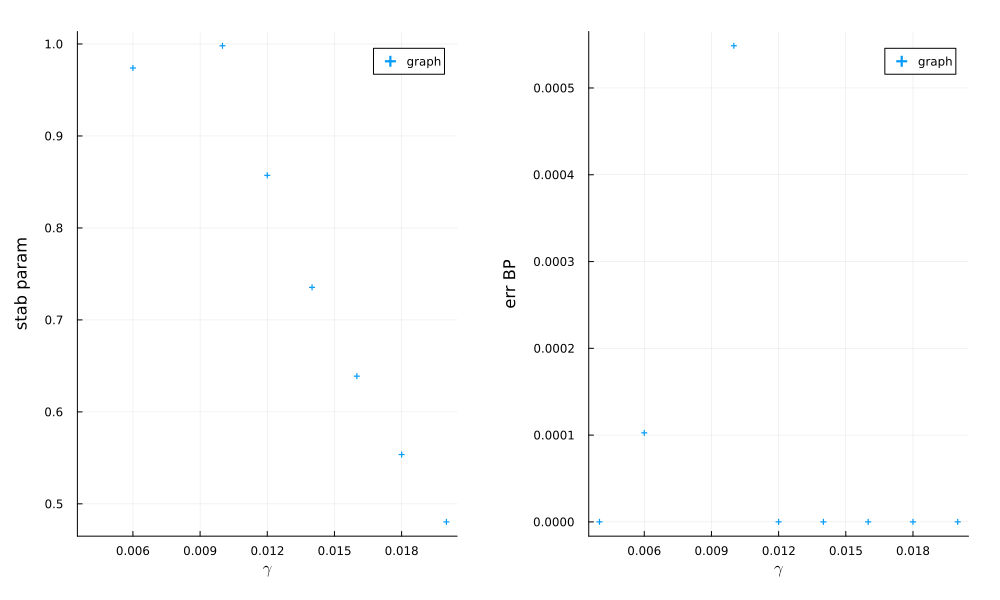

In [7]:
pstab_1=plot(yaxis="stab param", xaxis=L"γ")
scatter!(pstab_1,γ_range_1,mean_stab_1, yerr=std_stab_1, label="graph", markershape=:+, markerstrokewidth=1, markersize = 3)
#scatter!(pstab_1,γ_range,mean_stab, yerr=std_stab, label="pop", markershape=:+, markerstrokewidth=1, markersize = 3);

perr_1=plot(yaxis="err BP", xaxis=L"γ")
scatter!(perr_1,γ_range_1,mean_err_1, yerr=std_err_1, label="graph", markershape=:+, markerstrokewidth=1, markersize = 3)
#scatter!(perr_1,γ_range,mean_err, yerr=std_err, label="pop", markershape=:+, markerstrokewidth=1, markersize = 3);

pγ_1= plot(pstab_1, perr_1, size=(1000,600), layout=(1,2), margin=6*Plots.mm)#, plot_title=pTIT)

# loop on γ (1 run per γ)

In [ ]:
T=8
LAM=1.0
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));

In [ ]:
N=10000
iter=500

In [ ]:
extension=""

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter = []
res_finalΔ = []
res_geomean = []
res_fit = []

g18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0184, 0.0185, 0.0186, 0.0188]
g19 = [0.019, 0.0192, 0.0196]
g20 = [0.02, 0.0205, 0.021, 0.022, 0.03]
GAM_range = vcat(g18,g19,g20)

for GAM in GAM_range
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter, iter_full[end])
    append!(res_finalΔ, res[iter_Δ[end],4])
    append!(res_geomean, gmΔ)
    append!(res_fit, sfitΔ)
    
end

In [ ]:
scatter!(pfits, GAM_range, res_fit, label="large IC N="*string(N), markershape=:+, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range, res_geomean, label="geo N="*string(N), markershape=:+, markerstrokewidth=2, markersize = 4)

In [ ]:
extension="_run101"

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter_101 = []
res_finalΔ_101 = []
res_geomean_101 = []
res_fit_101 = []

GAM_range_101 = [0.018, 0.0182, 0.0185, 0.019, 0.02]


for GAM in GAM_range_101
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter_101, iter_full[end])
    append!(res_finalΔ_101, res[iter_Δ[end],4])
    append!(res_geomean_101, gmΔ)
    append!(res_fit_101, sfitΔ)
    
end

In [ ]:
scatter!(pfits, GAM_range_101, res_fit_101, label="small IC N="*string(N), markershape=:x, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range_101, res_geomean_101, label="geo2 N="*string(N), markershape=:x, markerstrokewidth=2, markersize = 4)

In [ ]:
#savefig(pfits, "checkIC_T"*string(T)*"_LAM"*string(LAM)*".pdf")

In [ ]:
fitrange = 0.013:0.001:0.03

#fit a_s*(x-c_s)
a_s             = 53.308           #+/- 0.7836       (1.47%)
c_s             = 0.0165002        #+/- 4.744e-05    (0.2875%)
pfs=plot(yaxis="(1-stab_param)^2",xaxis="γ")
scatter!(pfs, GAM_range, (1.0 .-res_geomean).^2, label="N="*string(N), markershape=:+)
plot!(pfs, fitrange, a_s.*(fitrange.-c_s), label="linear fit")
hline!(pfs, [0], label="")

In [ ]:
#fit lin a_l*x+b_l
a_l             = 77.1548          #+/- 1.094        (1.418%)
c_l             = 0.0142685        #+/- 6.099e-05    (0.4275%)
#fit quad a_q*(x**2)+b_q*x+c_q
a_q             = -3440.57         #+/- 662.6        (19.26%)
b_q             = 201.457          #+/- 26.36        (13.09%)
c_q             = -2.22298         #+/- 0.2613       (11.76%)
#find zeros
disc=b_q^2-4*a_q*c_q
sol1, sol2 = (-b_q-sqrt(disc))/(2*a_q), (-b_q+sqrt(disc))/(2*a_q)

In [ ]:
pflq=plot(yaxis="1-stab_param",xaxis="γ")
scatter!(pflq, GAM_range, (1.0 .-res_geomean), label="N="*string(N), markershape=:+)
plot!(pflq, fitrange, a_l.*(fitrange.-c_l), label="linear")
plot!(pflq, fitrange, a_q.*(fitrange.^2).+b_q.*fitrange.+c_q, label="quadratic")
hline!(pflq, [0], label="")

In [ ]:
plot(pfs, pflq, size=(800,400), margin=6*Plots.mm, plot_title="comparison fits (T="*string(T)*", λ="*string(LAM)*")")

In [ ]:
#savefig("fit_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*".pdf")

# size study at γ=0.0182

In [ ]:
T=8
LAM=1.0
GAM=0.0183
path = "tmp_stab/res_epid_stab/gam"*string(GAM)*"/"
iter=500
N_range=[50000]#[5000, 10000, 50000, 100000]
#runs_range = 1:10
runs_range = 101:110

In [ ]:
gam_res = zeros(length(N_range), length(runs_range));
err_res = zeros(length(N_range), length(runs_range));
list_AUC = []
list_pla = []
list_inf = [];

In [ ]:
for isiz in 1:length(N_range)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        N=N_range[isiz]

        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*"fileres_epid_stab"*nameparams*extension*string(run)
        nameobs =  path*"obs_epid_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        fobs = readdlm(nameobs);

        res = file[3:end,1:4]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

        if res[iter_Δ[end],4] < 1
            #geometrical mean
            ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))        
            #linear fit
            log_Δ = log.(res[iter_Δ[halfiter:end],4])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            gmΔ=Inf
            sfitΔ=Inf
        end
        
        err=res[end-1,2]
        err_res[isiz,irun]=err
        #@show N, run, err
        
        gam_res[isiz,irun]=sfitΔ

        res_obs = fobs[3:end,:]
        half_obs = 3*Int64(round(size(res_obs)[1]/6))
        end_obs = size(res_obs)[1]
        half_obs, end_obs
        inds_AUC=[mod(i,3) == 0 && i>half_obs for i in 1:end_obs]
        inds_pla=[mod(i,3) == 1 && i>half_obs for i in 1:end_obs]
        inds_inf=[mod(i,3) == 2 && i>half_obs for i in 1:end_obs];
        mean_AUC = mean(res_obs[inds_AUC,2:end], dims=1)[1,:]
        std_AUC = std(res_obs[inds_AUC,2:end], dims=1)[1,:]
        mean_inf = mean(res_obs[inds_inf,2:end], dims=1)[1,:]
        std_inf = std(res_obs[inds_inf,2:end], dims=1)[1,:]
        mean_pla = mean(res_obs[inds_pla,2:end], dims=1)[1,:]
        std_pla = std(res_obs[inds_pla,2:end], dims=1)[1,:];
        
        push!(list_AUC, [N_range[isiz], run, mean_AUC, std_AUC])
        push!(list_pla, [N_range[isiz], run, mean_pla, std_pla])
        push!(list_inf, [N_range[isiz], run, mean_inf, std_inf]);
    end
end

In [ ]:
for isiz in 1:length(N_range)
    N=N_range[isiz]
    mean_err=mean(err_res[isiz,:])
    std_err=std(err_res[isiz,:])
    @show isiz, mean_err, std_err
end

In [ ]:
permutedims(err_res)

In [ ]:
permutedims(gam_res)

In [ ]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(N_range))
std_stab = zeros(length(N_range));
for isiz in 1:length(N_range)
    N=N_range[isiz]
    indicesconv=.!isinf.(gam_res[isiz,:])
    mean_stab[isiz]=mean(gam_res[isiz,indicesconv])
    std_stab[isiz]=std(gam_res[isiz,indicesconv])
end

In [ ]:
hcat(mean_stab,std_stab)

In [ ]:
pstab=plot(yaxis="stab param", xaxis="log_10(size)")
scatter!(pstab,log.(N_range)./log(10),mean_stab, yerr=std_stab, label="");
pconv=plot(yaxis="fraction runs with Δ converged", xaxis="log_10(size)")
scatter!(pconv, log.(N_range)./log(10),frac_conv, label="");
pTIT="size comparison at γ="*string(GAM)*" (10runs) (T="*string(T)*", λ="*string(LAM)*")"
plot(pstab, pconv, size=(900,400), margin=6*Plots.mm, plot_title=pTIT)

In [ ]:
#savefig("sizestudy_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")

In [ ]:
isinf.(gam_res)

In [ ]:
iconv=22
idiv=28;

In [ ]:
pAUC = plot(xaxis="epid time", yaxis="AUC")
scatter!(pAUC, 1:(T+1), list_AUC[iconv][3], yerr=list_AUC[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pAUC, 1:(T+1), list_AUC[idiv][3], yerr=list_AUC[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
ppla = plot(xaxis="epid time", yaxis="planted marg")
scatter!(ppla, 1:(T+1), list_pla[iconv][3], yerr=list_pla[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(ppla, 1:(T+1), list_pla[idiv][3], yerr=list_pla[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
pinf = plot(xaxis="epid time", yaxis="inferred marg")
scatter!(pinf, 1:(T+1), list_inf[iconv][3], yerr=list_inf[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pinf, 1:(T+1), list_inf[idiv][3], yerr=list_inf[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
TIT="comparison 2 runs (γ="*string(GAM)*", T="*string(T)*", λ="*string(LAM)*")"
plot(pAUC, ppla, pinf, size=(1000,400), layout=(1,3), margin=6*Plots.mm, plot_title=TIT)

In [ ]:
#savefig("observables_divconvstability_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")